# Homework of week 7(Machine Learning)
To preedict whether the income of a preson exceeds 50k $/year  
(Dataset can be accessed from <http://archive.ics.uci.edu/ml/datasets/Adult>)

## Download dataset

In [1]:
import os
import urllib.request

print("Begin downloading adult dataset...")

data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
description_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"
test_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
if not os.path.isfile("adult.data"):
    urllib.request.urlretrieve(data_url, "adult.data")
    urllib.request.urlretrieve(description_url, "adult.names")
    urllib.request.urlretrieve(test_url, "adult.test")

Begin downloading adult dataset...


## Data preprocessing

In [114]:
import numpy as np
import pandas as pd
attr = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv("adult.data", names=attr, sep=',')
test = pd.read_csv("adult.test", names=attr, sep=',')
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [115]:
data["workclass"].replace(' ?', "private", inplace=True)
test["workclass"].replace(' ?', "private", inplace=True)
y_train = data["income"]
data.drop(["income"], axis=1, inplace=True)
test.drop(0, axis=0, inplace=True)
y_test = test["income"]
test.drop(["income"], axis=1, inplace=True)
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
5,18,private,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States
16278,64,private,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States


In [116]:
adult_attr = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
total_train = pd.concat([data, test], axis=0)
total_train.replace(' ?', np.nan, inplace=True)
modes = total_train.mode().iloc[0]
total_train.fillna(modes, inplace=True)
print("Train size: {}".format(len(data)))
print("Test size: {}".format(len(test)))
total_train

Train size: 32561
Test size: 16281


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States
16278,64,private,321403.0,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,0.0,40.0,United-States
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States


In [117]:
for a in adult_attr:
    '''
    data[a] = pd.Categorical(data[a])
    dummies = pd.get_dummies(data[a], prefix="{}_category".format(a))
    data = pd.concat([data, dummies], axis=1)
    test[a] = pd.Categorical(test[a])
    dummies_test = pd.get_dummies(test[a], prefix="{}_category".format(a))
    test = pd.concat([test, dummies_test], axis=1)
    '''
    total_train[a] = pd.Categorical(total_train[a])
    dummies = pd.get_dummies(total_train[a], prefix="{}_category".format(a))
    total_train = pd.concat([total_train, dummies], axis=1)
# data.drop(adult_attr, axis=1, inplace=True)
# test.drop(adult_attr, axis=1, inplace=True)
total_train.drop(adult_attr, axis=1, inplace=True)
y_train.replace(" <=50K", 0, inplace=True)
y_train.replace(" >50K", 1, inplace=True)
y_test.replace(" <=50K.", 0, inplace=True)
y_test.replace(" >50K.", 1, inplace=True)
data = total_train[:32561]
test = total_train[32561:]
# data.head()
total_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_category_ Federal-gov,workclass_category_ Local-gov,workclass_category_ Never-worked,workclass_category_ Private,...,native-country_category_ Portugal,native-country_category_ Puerto-Rico,native-country_category_ Scotland,native-country_category_ South,native-country_category_ Taiwan,native-country_category_ Thailand,native-country_category_ Trinadad&Tobago,native-country_category_ United-States,native-country_category_ Vietnam,native-country_category_ Yugoslavia
0,39,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311.0,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721.0,7.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409.0,13.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,215419.0,13.0,0.0,0.0,36.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16278,64,321403.0,9.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16279,38,374983.0,13.0,0.0,0.0,50.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16280,44,83891.0,13.0,5455.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [118]:
'''
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=1)
print("Train size: {}".format(len(X_train)))
print("Test size: {}".format(len(X_test)))
'''
print("Train size: {}".format(len(data)))
print("Test size: {}".format(len(test)))
test

Train size: 32561
Test size: 16281


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_category_ Federal-gov,workclass_category_ Local-gov,workclass_category_ Never-worked,workclass_category_ Private,...,native-country_category_ Portugal,native-country_category_ Puerto-Rico,native-country_category_ Scotland,native-country_category_ South,native-country_category_ Taiwan,native-country_category_ Thailand,native-country_category_ Trinadad&Tobago,native-country_category_ United-States,native-country_category_ Vietnam,native-country_category_ Yugoslavia
1,25,226802.0,7.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,89814.0,9.0,0.0,0.0,50.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,28,336951.0,12.0,0.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,44,160323.0,10.0,7688.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,18,103497.0,10.0,0.0,0.0,30.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,215419.0,13.0,0.0,0.0,36.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16278,64,321403.0,9.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16279,38,374983.0,13.0,0.0,0.0,50.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16280,44,83891.0,13.0,5455.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [119]:
X_train = data
X_test = test
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler().fit(X_train)
train_data = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
test_data = scaler.transform(X_test)

## Training & Evaluation

In [140]:
'''
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)  # MSE: 0.11518450570731804
print(model.score(X_test, y_test)) # score: 0.36158784660685306
                                   # cross_val_score: [0.35418674 0.35987362 0.34900221 0.35725553 0.36291366]
'''

0.36158784660685306


In [130]:
'''
from sklearn import naive_bayes
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)  # MSE：0.2042257846569621
print(model.score(X_test, y_test)) # score：0.7957742153430379
                                   # cross_val_score：[0.7979736  0.79637592 0.78961916 0.79514742 0.79576167]
'''

0.7957742153430379


In [121]:
'''
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)  # MSE：0.18635218966893927
print(model.score(X_test, y_test))        # score：0.8136478103310607
                                   # cross_val_score：[0.8059564  0.81357494 0.80620393 0.80712531 0.81265356]
'''

0.8136478103310607


In [134]:
'''
from sklearn.svm import SVC # (very slow!!!)
model = SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)   # MSE：0.20140040538050488
print(model.score(X_test, y_test))  # score：0.7985995946194951
                                    # cross_val_score：[0.79548595 0.79376536 0.79468673 0.79637592 0.79422604]
'''

0.7985995946194951


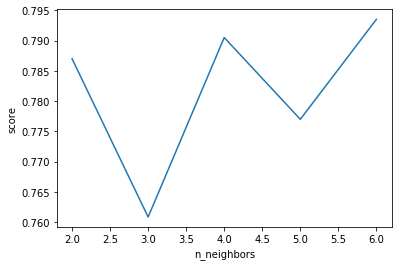

In [136]:
'''
from sklearn import neighbors
import matplotlib.pyplot as plt
scores = []
for i in range(2,7):
    model = neighbors.KNeighborsClassifier(n_neighbors=i, n_jobs=1)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores.append(model.score(X_test, y_test))
plt.plot(range(2, 7), scores)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.show() # So we choose n_neighbors=6 as the parameter
'''

In [137]:
'''
model = neighbors.KNeighborsClassifier(n_neighbors=6, n_jobs=1) # MSE：0.2064983723358516
model.fit(X_train, y_train)                                     # score：0.794
y_predict = model.predict(X_test)                               # cross_val_score：[0.7970525  0.79207617 0.78808354 0.78286241 0.79146192]
'''

In [97]:
'''
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)       # MLPC can't work well
y_predict = model.predict(X_test) # MSE：0.16079105760963028
print(model.score(X_test, y_test))       # score：0.8376278369828937
'''

0.8376278369828937


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [141]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predict))

0.11518450570731804


In [139]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X_test, y_test))

[0.7970525  0.79207617 0.78808354 0.78286241 0.79146192]


## Summary
The best model above is **Decision Tree**, score of which can reaches **0.8136478103310607**.  

| Model | score | MSE |  
| :-: | :-: | :-: |  
| Linear Regression | 0.36158784660685306 | 0.11518450570731804 |  
| Naive-bayes | 0.7957742153430379 | 0.2042257846569621 |  
| Decision Tree | 0.8136478103310607 | 0.18635218966893927 |  
|  SVC       | 0.7985995946194951 | 0.20140040538050488 |  
| KNN(n = 6) | 0.794 | 0.2064983723358516 |  